# Image Cropping | Facial Recognition

This script is a part of a facial recognition project. It's purpose is to preprocess the images for use in the later parts of the project. Here's a high-level explanation of the script:

1. ***Imports:*** The script begins by importing necessary libraries. These are numpy for numerical operations, cv2 for image processing, matplotlib.pyplot for visualization, and glob for fetching file paths.

2. ***Data Paths:*** It then sets the paths to where the images of female and male faces are stored.

3. ***Image Loading:*** It then loads a single image from the dataset. This is most likely for exploratory purposes or for demonstration of the preprocessing steps.

4. ***Displaying the Image:*** The loaded image is displayed.

5. ***Converting to Grayscale:*** The image is converted to grayscale as this is a common preprocessing step in image processing tasks. It helps reduce computational complexity by eliminating the color channels.

6. ***Face Detection:*** It then loads a Haar Cascade classifier, which is a machine learning object detection method used to identify objects in an image or video. In this case, it is used to detect the faces in the images.

7. ***Drawing the Boundaries:*** Once faces are detected, the script draws rectangles around them in the image and displays it.

8. ***Cropping the Faces:*** The image is cropped to only include the face and displayed. This cropped image is then saved. This is likely done to remove unnecessary background information and ensure that the model only trains on relevant features.

9. ***Batch Processing:*** The script defines a function extract_images() to automate the face extraction process for all images. It takes the image path, gender, and a numerical index as input. It opens each image, converts it to grayscale, detects the face, crops the image to the face, and then saves it in a specified directory.

10. ***Processing All Images:*** Finally, the script uses the function defined earlier to process all images in the femalepath and malepath. It prints a progress message for each image processed. If an image cannot be processed due to an error (e.g. file not found, invalid file format), it catches the exception and prints an error message. This way, even if some images cannot be processed, the script can continue running.

Overall, this script serves as a preprocessing step in a facial recognition pipeline, where raw images are converted into a more manageable and uniform format (grayscale, cropped to face) for subsequent machine learning or deep learning tasks.

In [4]:
# Import necessary libraries
import numpy as np  # For numerical operations
import cv2  # For image processing
import matplotlib.pyplot as plt  # For plotting and visualizations
%matplotlib inline  
from glob import glob  

In [10]:
# Define the path for female and male images
femalepath = glob(r"W:\MayCooperStation\New Documents\Data Science and ML\FacialRecognition\data\female\*.jpg")
malepath = glob(r"W:\MayCooperStation\New Documents\Data Science and ML\FacialRecognition\data\male\*.jpg")

In [11]:
# Print the number of female and male images
len(femalepath), len(malepath)

(7000, 7000)

In [12]:
# Pick one image for demonstration
path = femalepath[0]
img = cv2.imread(path)  # Read the image

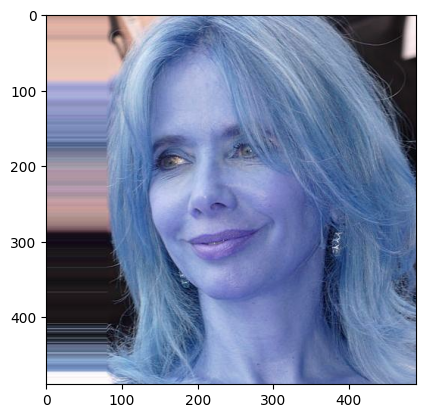

In [13]:
# Display the image
plt.imshow(img)
plt.show()

In [14]:
# Convert the image into grayscale for easier processing
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape  # Print the dimensions of the grayscale image

(489, 490)

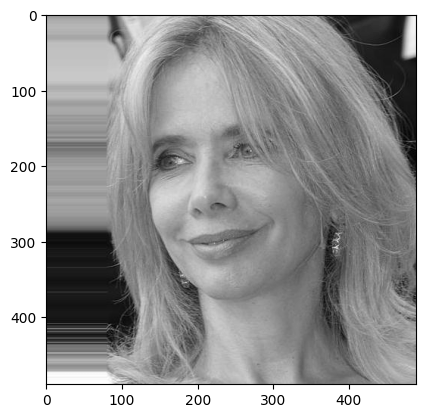

In [15]:
# Display the grayscale image
plt.imshow(gray,cmap='gray')

In [16]:
# Load the haar cascade classifier, used for face detection
haar = cv2.CascadeClassifier(r'W:\MayCooperStation\New Documents\Data Science and ML\FacialRecognition\data\haarcascade_frontalface_default.xml')

In [17]:
# Detect faces in the image
faces = haar.detectMultiScale(gray,1.5,5)
print(faces)  # Print the coordinates of detected faces

[[ 86  86 273 273]]


In [18]:
# Draw rectangles around the detected faces
for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

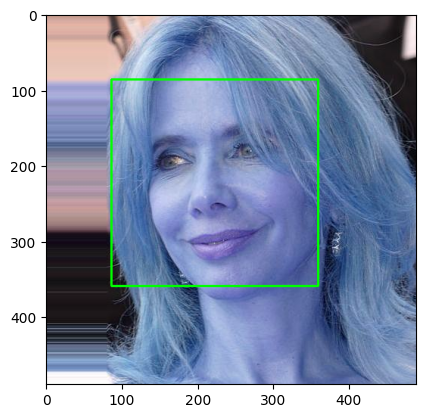

In [19]:
# Display the image with rectangles
plt.imshow(img)


In [20]:
# Crop the image to only the face area
crop_img = img[y:y+h,x:x+h]

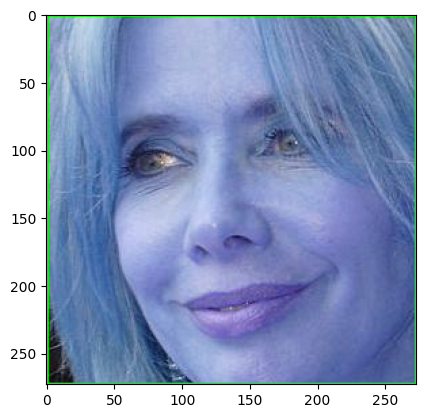

In [21]:
# Display the cropped image
plt.imshow(crop_img)

In [22]:
# Save the cropped image
cv2.imwrite('f_01.png',crop_img)

True

In [29]:
# Define a function to extract faces from all images
def extract_images(path,gender,i):
    img = cv2.imread(path)  # Read the image
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    faces = haar.detectMultiScale(gray,1.5,5)  # Detect faces
    
    # For each detected face, draw rectangle, crop and save the image
    for x,y,w,h in faces:
        roi = img[y:y+h,x:x+w]
        if gender == 'male':
            cv2.imwrite(r'W:\MayCooperStation\New Documents\Data Science and ML\FacialRecognition\data\crop\male_crop\{}_{}.png'.format(gender,i),roi)
        else:
            cv2.imwrite(r'W:\MayCooperStation\New Documents\Data Science and ML\FacialRecognition\data\crop\female_crop\{}_{}.png'.format(gender,i),roi)

In [30]:
# Apply the function to the first female image
extract_images(femalepath[0],'female',1)

In [31]:
# Apply the function to all female images
for i,path in enumerate(femalepath):
    try:
        extract_images(path,'female',i)
        print('INFO: {}/{} processed successfully'.format(i,len(femalepath)))
    except:
        print('INFO: {}/{} cannot be processed'.format(i,len(femalepath)))

INFO: 0/7000 processed successfully
INFO: 1/7000 processed successfully
INFO: 2/7000 processed successfully
INFO: 3/7000 processed successfully
INFO: 4/7000 processed successfully
INFO: 5/7000 processed successfully
INFO: 6/7000 processed successfully
INFO: 7/7000 processed successfully
INFO: 8/7000 processed successfully
INFO: 9/7000 processed successfully
INFO: 10/7000 processed successfully
INFO: 11/7000 processed successfully
INFO: 12/7000 processed successfully
INFO: 13/7000 processed successfully
INFO: 14/7000 processed successfully
INFO: 15/7000 processed successfully
INFO: 16/7000 processed successfully
INFO: 17/7000 processed successfully
INFO: 18/7000 processed successfully
INFO: 19/7000 processed successfully
INFO: 20/7000 processed successfully
INFO: 21/7000 processed successfully
INFO: 22/7000 processed successfully
INFO: 23/7000 processed successfully
INFO: 24/7000 processed successfully
INFO: 25/7000 processed successfully
INFO: 26/7000 processed successfully
INFO: 27/70

In [32]:
# Apply the function to all male images
for i,path in enumerate(malepath):
    try:
        extract_images(path,'male',i)
        print('INFO: {}/{} processed successfully'.format(i,len(malepath)))
    except:
        print('INFO: {}/{} cannot be processed'.format(i,len(malepath)))

INFO: 0/7000 processed successfully
INFO: 1/7000 processed successfully
INFO: 2/7000 processed successfully
INFO: 3/7000 processed successfully
INFO: 4/7000 processed successfully
INFO: 5/7000 processed successfully
INFO: 6/7000 processed successfully
INFO: 7/7000 processed successfully
INFO: 8/7000 processed successfully
INFO: 9/7000 processed successfully
INFO: 10/7000 processed successfully
INFO: 11/7000 processed successfully
INFO: 12/7000 processed successfully
INFO: 13/7000 processed successfully
INFO: 14/7000 processed successfully
INFO: 15/7000 processed successfully
INFO: 16/7000 processed successfully
INFO: 17/7000 processed successfully
INFO: 18/7000 processed successfully
INFO: 19/7000 processed successfully
INFO: 20/7000 processed successfully
INFO: 21/7000 processed successfully
INFO: 22/7000 processed successfully
INFO: 23/7000 processed successfully
INFO: 24/7000 processed successfully
INFO: 25/7000 processed successfully
INFO: 26/7000 processed successfully
INFO: 27/70